In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from  matplotlib.patches import Polygon
from IPython.display import Image
import imageio.v2
import csv

import tqdm as tqdm
import jax 
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_debug_nans", False)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from iLQR import iLQR, Path



In [3]:
from iLQR.cost.obstacle_cost import SingleObstacleCost
from iLQR.config import Config
import jax.numpy as jnp
config = Config()

c = SingleObstacleCost(config)
# s = jnp.array([0.1,     5.40382, 3. ,     3.14,    0.     ])
# u = jnp.array([0,0.0])
# ref = jnp.array([-0.02245, -0.11,     0.12263,  5.51379, -0.01])
s = jnp.array([0,     0, 3.,     0,    0.     ])
u = jnp.array([0,0.0])
ref = jnp.array([0, 0.11,    0,  0.11, -0.01])
print(c.get_running_cost(s,u,ref))

cx = jax.jacfwd(c.get_running_cost, argnums=0)
cx(s,u,ref)

15.015


Array([0., 0., 0., 0., 0.], dtype=float32)

In [4]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

Update from  188.20428  to  129.67201 reg:  1.0 alpha:  0.31622776601683794 2.5833773612976074
Update from  129.67201  to  103.77577 reg:  0.5 alpha:  1.0 2.5870883464813232
Update from  103.77577  to  101.164635 reg:  0.25 alpha:  0.31622776601683794 2.5928468704223633
Update from  101.164635  to  99.25804 reg:  0.125 alpha:  1.0 2.5963246822357178
Update from  99.25804  to  98.9415 reg:  0.0625 alpha:  1.0 2.59975528717041
Update from  98.9415  to  98.85883 reg:  0.03125 alpha:  1.0 2.60325026512146
Update from  98.85883  to  98.840355 reg:  0.015625 alpha:  1.0 2.6067116260528564
Update from  98.840355  to  98.84032 reg:  0.0078125 alpha:  1.0 2.610095977783203
Update from  159.63206  to  138.98131 reg:  1.0 alpha:  1.0 0.012033462524414062
Update from  138.98131  to  128.55615 reg:  0.5 alpha:  1.0 0.01573801040649414
Update from  128.55615  to  127.850815 reg:  0.25 alpha:  1.0 0.01941823959350586
Update from  127.850815  to  125.73597 reg:  12.5 alpha:  0.0316227766016838 0.05669

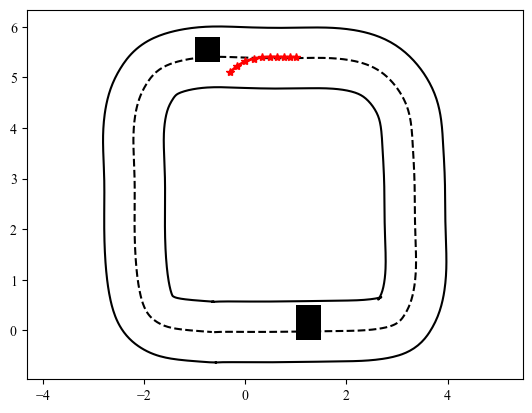

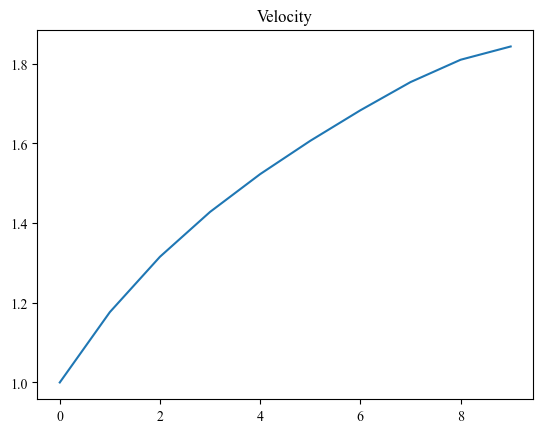

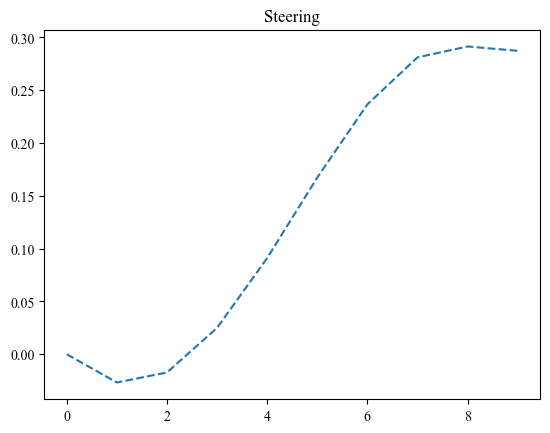

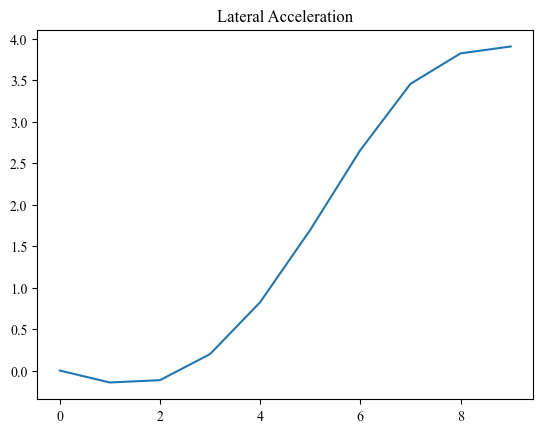

In [60]:
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)
solver = iLQR()
# # make some obstacles
# obs1 = np.array([[-1, -1, -0, -0], [5.2, 6.0, 6.0, 5.2]]).T
obs1 = np.array([[-1, -1, -0.5, -0.5], [5.3, 5.8, 5.8, 5.3]]).T
obs2 = np.array([[1, 1, 1.5, 1.5], [-0.2, 0.5, 0.5, -0.2]]).T
obs_list = [[obs1 for _ in range(10)]]#, [obs2 for _ in range(10)]]
solver.update_obstacles(obs_list)
solver.update_path(path)

x_cur = np.array([1, 5.4, 1, 3.14, 0])
plan = solver.plan(x_cur)

path.plot_track()
path.plot_track_center()
plt.plot(plan['states'][0, :], plan['states'][1, :], 'r-*', linewidth=2)

p = Polygon(obs1, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

p = Polygon(obs2, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

print(plan['status'])

plt.figure()
a = plan['states'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['states'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['states'][2, :]**2 / 0.257 * np.tan(plan['states'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')

print(plan['t_process'])


Update from  188.20428  to  129.67201 reg:  1.0 alpha:  0.31622776601683794 2.606872320175171
Update from  129.67201  to  103.77577 reg:  0.5 alpha:  1.0 2.6112749576568604
Update from  103.77577  to  101.164635 reg:  0.25 alpha:  0.31622776601683794 2.616762161254883
Update from  101.164635  to  99.25804 reg:  0.125 alpha:  1.0 2.6211416721343994
Update from  99.25804  to  98.9415 reg:  0.0625 alpha:  1.0 2.6254804134368896
Update from  98.9415  to  98.85883 reg:  0.03125 alpha:  1.0 2.6288814544677734


iLQR takes : 0.37 sec']:   0%|          | 0/100 [00:00<?, ?it/s]

Update from  90.34918  to  82.49834 reg:  10000.0 alpha:  1.0 0.3149745464324951
Update from  82.49834  to  65.65308 reg:  5000.0 alpha:  1.0 0.3217964172363281
Update from  65.65308  to  60.612022 reg:  2500.0 alpha:  1.0 0.32840967178344727
Update from  60.612022  to  57.841133 reg:  1250.0 alpha:  1.0 0.33506107330322266
Update from  57.841133  to  55.44616 reg:  625.0 alpha:  1.0 0.3415236473083496
Update from  55.44616  to  52.56165 reg:  312.5 alpha:  1.0 0.3479759693145752
Update from  52.56165  to  50.15572 reg:  156.25 alpha:  1.0 0.35449790954589844
Update from  50.15572  to  50.126923 reg:  78.125 alpha:  0.0316227766016838 0.37269163131713867


iLQR takes : 0.14 sec']:   1%|          | 1/100 [00:00<00:51,  1.92it/s]

Update from  61.427856  to  61.251423 reg:  1.0 alpha:  0.31622776601683794 0.01584935188293457
Update from  61.251423  to  61.027245 reg:  500.0 alpha:  1.0 0.09560894966125488
Update from  61.027245  to  60.720055 reg:  250.0 alpha:  1.0 0.10192680358886719
Update from  60.720055  to  60.58377 reg:  125.0 alpha:  0.31622776601683794 0.11274099349975586
Update from  60.58377  to  60.507225 reg:  62.5 alpha:  0.1 0.12667346000671387
Update from  60.507225  to  60.49074 reg:  31.25 alpha:  0.1 0.14064955711364746


iLQR takes : 0.15 sec']:   2%|▏         | 2/100 [00:00<00:39,  2.50it/s]

Update from  77.27818  to  75.96856 reg:  1.0 alpha:  0.31622776601683794 0.015265941619873047
Update from  75.96856  to  75.1573 reg:  500.0 alpha:  1.0 0.0944051742553711
Update from  75.1573  to  74.13994 reg:  250.0 alpha:  1.0 0.10081958770751953
Update from  74.13994  to  74.00822 reg:  125.0 alpha:  0.0316227766016838 0.11860775947570801
Update from  74.00822  to  73.74437 reg:  62.5 alpha:  0.31622776601683794 0.12877726554870605
Update from  73.74437  to  73.740204 reg:  31.25 alpha:  0.010000000000000002 0.15172266960144043


iLQR takes : 0.12 sec']:   3%|▎         | 3/100 [00:01<00:35,  2.73it/s]

Update from  88.58777  to  86.61441 reg:  1.0 alpha:  0.31622776601683794 0.01891493797302246
Update from  86.61441  to  85.596176 reg:  500.0 alpha:  1.0 0.10108399391174316
Update from  85.596176  to  84.23252 reg:  250.0 alpha:  1.0 0.10755610466003418
Update from  84.23252  to  84.22044 reg:  125.0 alpha:  0.31622776601683794 0.11780810356140137


iLQR takes : 0.20 sec']:   4%|▍         | 4/100 [00:01<00:32,  2.98it/s]

Update from  93.6246  to  91.22058 reg:  10.0 alpha:  0.31622776601683794 0.04050493240356445
Update from  91.22058  to  89.680664 reg:  5.0 alpha:  0.31622776601683794 0.050961971282958984
Update from  89.680664  to  85.74243 reg:  250.0 alpha:  1.0 0.1046748161315918
Update from  85.74243  to  85.34475 reg:  1250.0 alpha:  1.0 0.1340188980102539
Update from  85.34475  to  84.79553 reg:  625.0 alpha:  1.0 0.14028549194335938
Update from  84.79553  to  83.743645 reg:  312.5 alpha:  1.0 0.14635014533996582
Update from  83.743645  to  83.338615 reg:  156.25 alpha:  0.31622776601683794 0.15639615058898926
Update from  83.338615  to  82.42515 reg:  78.125 alpha:  0.31622776601683794 0.16640686988830566
Update from  82.42515  to  82.11815 reg:  390.625 alpha:  1.0 0.19690346717834473
Update from  82.11815  to  82.08975 reg:  195.3125 alpha:  1.0 0.20328187942504883


iLQR takes : 0.12 sec']:   5%|▌         | 5/100 [00:01<00:33,  2.86it/s]

Update from  77.335175  to  77.10637 reg:  1.0 alpha:  0.1 0.01946854591369629
Update from  77.10637  to  76.69748 reg:  500.0 alpha:  1.0 0.0976111888885498
Update from  76.69748  to  76.43054 reg:  250.0 alpha:  1.0 0.1040046215057373
Update from  76.43054  to  76.41713 reg:  125.0 alpha:  0.1 0.11818122863769531


iLQR takes : 0.04 sec']:   7%|▋         | 7/100 [00:02<00:27,  3.44it/s]

Update from  74.540344  to  74.44092 reg:  1.0 alpha:  0.1 0.019539594650268555
Update from  74.44092  to  74.43536 reg:  0.5 alpha:  0.0316227766016838 0.03943467140197754


iLQR takes : 0.11 sec']:   7%|▋         | 7/100 [00:02<00:27,  3.44it/s]

Update from  73.012085  to  71.80837 reg:  1.0 alpha:  0.31622776601683794 0.018007755279541016
Update from  71.80837  to  71.10672 reg:  0.5 alpha:  1.0 0.025727033615112305
Update from  71.10672  to  71.10483 reg:  250.0 alpha:  0.1 0.11447930335998535


iLQR takes : 0.12 sec']:   8%|▊         | 8/100 [00:02<00:29,  3.15it/s]

Update from  63.9115  to  63.373215 reg:  1.0 alpha:  1.0 0.011387348175048828
Update from  63.373215  to  63.372475 reg:  5000.0 alpha:  1.0 0.11634159088134766


iLQR takes : 0.02 sec']:  10%|█         | 10/100 [00:03<00:24,  3.68it/s]

Update from  52.162598  to  52.11319 reg:  1.0 alpha:  1.0 0.011805057525634766
Update from  39.413025  to  39.368637 reg:  1.0 alpha:  1.0 0.011526823043823242
Update from  39.368637  to  39.362137 reg:  0.5 alpha:  1.0 0.01888585090637207


iLQR takes : 0.12 sec']:  11%|█         | 11/100 [00:03<00:22,  4.02it/s]

Update from  25.615335  to  24.689468 reg:  1.0 alpha:  1.0 0.011764764785766602
Update from  24.689468  to  24.608952 reg:  0.5 alpha:  1.0 0.019105911254882812
Update from  24.608952  to  24.608948 reg:  250.0 alpha:  0.010000000000000002 0.11708521842956543


iLQR takes : 0.09 sec']:  12%|█▏        | 12/100 [00:03<00:23,  3.81it/s]

Update from  9.846487  to  8.660374 reg:  1.0 alpha:  1.0 0.011539936065673828
Update from  8.660374  to  8.659767 reg:  500.0 alpha:  1.0 0.09465479850769043


iLQR takes : 0.02 sec']:  14%|█▍        | 14/100 [00:04<00:21,  4.06it/s]

Update from  1.970376  to  1.508864 reg:  1.0 alpha:  1.0 0.012134790420532227
Update from  1.508864  to  1.5083802 reg:  0.5 alpha:  0.31622776601683794 0.02425837516784668


iLQR takes : 0.06 sec']:  14%|█▍        | 14/100 [00:04<00:21,  4.06it/s]

Update from  -0.22093032  to  -0.23394412 reg:  1.0 alpha:  0.31622776601683794 0.016064167022705078
Update from  -0.23394412  to  -0.24154027 reg:  0.5 alpha:  0.1 0.031235456466674805
Update from  -0.24154027  to  -0.24173714 reg:  0.25 alpha:  0.00316227766016838 0.05839848518371582


iLQR takes : 0.10 sec']:  15%|█▌        | 15/100 [00:04<00:20,  4.10it/s]

Update from  -1.3298936  to  -1.3336737 reg:  100.0 alpha:  1.0 0.06606602668762207
Update from  -1.3336737  to  -1.3361105 reg:  50.0 alpha:  0.1 0.08066129684448242
Update from  -1.3361105  to  -1.3372313 reg:  25.0 alpha:  0.0316227766016838 0.09854722023010254


iLQR takes : 0.03 sec']:  17%|█▋        | 17/100 [00:04<00:21,  3.86it/s]

Update from  -2.20773  to  -2.2296667 reg:  1.0 alpha:  0.31622776601683794 0.015231132507324219
Update from  -2.2296667  to  -2.2316782 reg:  0.5 alpha:  0.1 0.030359506607055664


iLQR takes : 0.02 sec']:  18%|█▊        | 18/100 [00:05<00:19,  4.13it/s]

Update from  -2.970619  to  -3.2094123 reg:  1.0 alpha:  1.0 0.012024164199829102
Update from  -3.2094123  to  -3.2099235 reg:  0.5 alpha:  1.0 0.019910335540771484


iLQR takes : 0.05 sec']:  18%|█▊        | 18/100 [00:05<00:19,  4.13it/s]

Update from  -4.2849174  to  -4.2938514 reg:  1.0 alpha:  0.31622776601683794 0.016716957092285156
Update from  -4.2938514  to  -4.30786 reg:  0.5 alpha:  0.31622776601683794 0.029004335403442383
Update from  -4.30786  to  -4.310181 reg:  0.25 alpha:  0.1 0.044983625411987305


iLQR takes : 0.02 sec']:  20%|██        | 20/100 [00:05<00:17,  4.49it/s]

Update from  -4.663208  to  -4.888895 reg:  1.0 alpha:  1.0 0.011593818664550781
Update from  -4.888895  to  -4.889041 reg:  0.5 alpha:  1.0 0.01855158805847168
Update from  -4.5658035  to  -4.99369 reg:  1.0 alpha:  1.0 0.011417150497436523
Update from  -4.99369  to  -4.9938703 reg:  0.5 alpha:  1.0 0.01870107650756836


iLQR takes : 0.02 sec']:  22%|██▏       | 22/100 [00:05<00:16,  4.82it/s]

Update from  -4.360404  to  -4.8593626 reg:  1.0 alpha:  1.0 0.011556863784790039
Update from  -4.8593626  to  -4.8598113 reg:  0.5 alpha:  1.0 0.01895427703857422
Update from  -4.3724766  to  -4.5613813 reg:  1.0 alpha:  1.0 0.011282682418823242
Update from  -4.5613813  to  -4.6520104 reg:  0.5 alpha:  1.0 0.01874685287475586


iLQR takes : 0.03 sec']:  23%|██▎       | 23/100 [00:06<00:15,  4.83it/s]

Update from  -4.6520104  to  -4.675825 reg:  0.25 alpha:  1.0 0.025562524795532227
Update from  -4.675825  to  -4.6795254 reg:  0.125 alpha:  1.0 0.032629966735839844
Update from  -4.0154977  to  -4.352469 reg:  1.0 alpha:  1.0 0.011519193649291992
Update from  -4.352469  to  -4.369724 reg:  0.5 alpha:  1.0 0.01915431022644043


iLQR takes : 0.02 sec']:  24%|██▍       | 24/100 [00:06<00:15,  4.85it/s]

Update from  -4.369724  to  -4.3704343 reg:  0.25 alpha:  1.0 0.026249170303344727
Update from  -2.9119773  to  -3.525268 reg:  1.0 alpha:  1.0 0.012437582015991211
Update from  -3.525268  to  -3.5284688 reg:  0.5 alpha:  1.0 0.02044057846069336


iLQR takes : 0.13 sec']:  25%|██▌       | 25/100 [00:06<00:17,  4.32it/s]

Update from  4.955498  to  0.5333314 reg:  1.0 alpha:  1.0 0.01233363151550293
Update from  0.5333314  to  0.31401372 reg:  0.5 alpha:  0.31622776601683794 0.023869752883911133
Update from  0.31401372  to  0.12429595 reg:  25.0 alpha:  0.010000000000000002 0.09643363952636719
Update from  0.12429595  to  -0.002440691 reg:  12.5 alpha:  0.31622776601683794 0.10693573951721191
Update from  -0.002440691  to  -0.12956357 reg:  6.25 alpha:  1.0 0.11320042610168457
Update from  -0.12956357  to  -0.14009714 reg:  3.125 alpha:  1.0 0.11969304084777832
Update from  -0.14009714  to  -0.14020109 reg:  1.5625 alpha:  0.1 0.13391923904418945


iLQR takes : 0.13 sec']:  26%|██▌       | 26/100 [00:06<00:18,  3.90it/s]

Update from  23.10833  to  11.656678 reg:  1.0 alpha:  1.0 0.011404037475585938
Update from  11.656678  to  10.585076 reg:  0.5 alpha:  0.0316227766016838 0.0340421199798584
Update from  10.585076  to  7.8860435 reg:  0.25 alpha:  1.0 0.0411381721496582
Update from  7.8860435  to  7.8683395 reg:  0.125 alpha:  0.31622776601683794 0.052739620208740234
Update from  7.8683395  to  7.8128257 reg:  625.0 alpha:  1.0 0.16315698623657227
Update from  7.8128257  to  7.7954483 reg:  312.5 alpha:  0.00316227766016838 0.19302105903625488


iLQR takes : 0.24 sec']:  27%|██▋       | 27/100 [00:07<00:22,  3.29it/s]

Update from  7.7954483  to  7.779504 reg:  1562.5 alpha:  1.0 0.22937250137329102
Update from  7.779504  to  7.7752943 reg:  781.25 alpha:  0.31622776601683794 0.2412583827972412
Update from  18.140865  to  15.580251 reg:  1.0 alpha:  1.0 0.011457443237304688


iLQR takes : 0.13 sec']:  27%|██▋       | 27/100 [00:07<00:22,  3.29it/s]

Update from  15.580251  to  15.450166 reg:  0.5 alpha:  1.0 0.020915508270263672
Update from  15.450166  to  15.397423 reg:  250.0 alpha:  0.31622776601683794 0.1121518611907959
Update from  15.397423  to  15.390984 reg:  125.0 alpha:  0.1 0.1266794204711914


iLQR takes : 0.09 sec']:  29%|██▉       | 29/100 [00:07<00:20,  3.43it/s]

Update from  26.918383  to  26.752117 reg:  100.0 alpha:  1.0 0.06529021263122559
Update from  26.752117  to  26.747448 reg:  50.0 alpha:  0.0316227766016838 0.08835101127624512


iLQR takes : 0.04 sec']:  29%|██▉       | 29/100 [00:07<00:20,  3.43it/s]

Update from  42.33364  to  41.660408 reg:  1.0 alpha:  1.0 0.012418031692504883
Update from  41.660408  to  41.612965 reg:  0.5 alpha:  1.0 0.019570112228393555
Update from  41.612965  to  41.61207 reg:  0.25 alpha:  0.0316227766016838 0.0391383171081543


iLQR takes : 0.16 sec']:  30%|███       | 30/100 [00:08<00:18,  3.72it/s]

Update from  65.258606  to  61.45858 reg:  1.0 alpha:  0.31622776601683794 0.015749216079711914
Update from  61.45858  to  61.309418 reg:  0.5 alpha:  0.31622776601683794 0.027777433395385742
Update from  61.309418  to  60.215385 reg:  250.0 alpha:  1.0 0.11090707778930664
Update from  60.215385  to  59.477455 reg:  125.0 alpha:  1.0 0.11744451522827148
Update from  59.477455  to  59.180347 reg:  62.5 alpha:  0.1 0.13239002227783203
Update from  59.180347  to  59.17737 reg:  31.25 alpha:  0.00316227766016838 0.15903401374816895


iLQR takes : 0.21 sec']:  31%|███       | 31/100 [00:08<00:19,  3.46it/s]

Update from  87.262634  to  86.57657 reg:  1.0 alpha:  0.31622776601683794 0.015572071075439453
Update from  86.57657  to  84.958046 reg:  500.0 alpha:  1.0 0.096527099609375
Update from  84.958046  to  81.68945 reg:  250.0 alpha:  1.0 0.10289263725280762
Update from  81.68945  to  80.21137 reg:  125.0 alpha:  1.0 0.10926961898803711
Update from  80.21137  to  78.45086 reg:  62.5 alpha:  0.31622776601683794 0.11970686912536621
Update from  78.45086  to  69.782364 reg:  31.25 alpha:  1.0 0.12607789039611816
Update from  69.782364  to  61.534626 reg:  15.625 alpha:  0.31622776601683794 0.13650774955749512
Update from  61.534626  to  60.586136 reg:  7.8125 alpha:  0.31622776601683794 0.14708757400512695
Update from  60.586136  to  59.920547 reg:  3.90625 alpha:  0.31622776601683794 0.15770220756530762
Update from  59.920547  to  59.901222 reg:  195.3125 alpha:  1.0 0.21354293823242188


iLQR takes : 0.04 sec']:  32%|███▏      | 32/100 [00:08<00:21,  3.13it/s]

Update from  58.76896  to  58.4439 reg:  1.0 alpha:  0.1 0.020493030548095703
Update from  58.4439  to  58.417267 reg:  0.5 alpha:  0.1 0.036199331283569336


iLQR takes : 0.05 sec']:  34%|███▍      | 34/100 [00:09<00:18,  3.50it/s]

Update from  57.777245  to  57.71823 reg:  1.0 alpha:  0.0316227766016838 0.02501821517944336
Update from  57.71823  to  57.711643 reg:  0.5 alpha:  0.0316227766016838 0.045408010482788086


iLQR takes : 0.02 sec']:  35%|███▌      | 35/100 [00:09<00:16,  3.83it/s]

Update from  65.953674  to  62.56984 reg:  1.0 alpha:  1.0 0.012430429458618164
Update from  62.56984  to  62.558197 reg:  0.5 alpha:  0.31622776601683794 0.024637460708618164


iLQR takes : 0.05 sec']:  35%|███▌      | 35/100 [00:09<00:16,  3.83it/s]

Update from  78.32738  to  74.528 reg:  1.0 alpha:  1.0 0.01237940788269043
Update from  74.528  to  74.339325 reg:  0.5 alpha:  0.1 0.028124332427978516
Update from  74.339325  to  74.246635 reg:  0.25 alpha:  0.31622776601683794 0.038942813873291016
Update from  74.246635  to  74.23948 reg:  0.125 alpha:  0.1 0.05347776412963867


iLQR takes : 0.04 sec']:  36%|███▌      | 36/100 [00:09<00:16,  3.98it/s]

Update from  95.1853  to  88.98738 reg:  1.0 alpha:  1.0 0.01361846923828125
Update from  88.98738  to  88.31993 reg:  0.5 alpha:  0.31622776601683794 0.024985790252685547
Update from  88.31993  to  88.31956 reg:  0.25 alpha:  0.0316227766016838 0.0449063777923584


iLQR takes : 0.10 sec']:  37%|███▋      | 37/100 [00:10<00:15,  4.14it/s]

Update from  109.80812  to  104.75235 reg:  1.0 alpha:  1.0 0.011452674865722656
Update from  104.75235  to  104.19348 reg:  0.5 alpha:  0.31622776601683794 0.02259063720703125
Update from  104.19348  to  103.19362 reg:  0.25 alpha:  1.0 0.029677629470825195
Update from  103.19362  to  103.07175 reg:  0.125 alpha:  1.0 0.0364224910736084
Update from  103.07175  to  102.741615 reg:  0.0625 alpha:  1.0 0.04285240173339844
Update from  102.741615  to  102.74159 reg:  0.3125 alpha:  0.00316227766016838 0.09493732452392578


iLQR takes : 0.11 sec']:  38%|███▊      | 38/100 [00:10<00:15,  4.01it/s]

Update from  127.78604  to  120.28794 reg:  1.0 alpha:  0.31622776601683794 0.015446662902832031
Update from  120.28794  to  120.05904 reg:  0.5 alpha:  0.31622776601683794 0.026528596878051758
Update from  120.05904  to  120.05318 reg:  250.0 alpha:  1.0 0.10543632507324219


iLQR takes : 0.20 sec']:  39%|███▉      | 39/100 [00:10<00:15,  3.86it/s]

Update from  148.35289  to  142.11557 reg:  1.0 alpha:  0.31622776601683794 0.016724348068237305
Update from  142.11557  to  141.08235 reg:  50.0 alpha:  0.1 0.08069658279418945
Update from  141.08235  to  140.82858 reg:  25.0 alpha:  0.31622776601683794 0.09091782569885254


iLQR takes : 0.02 sec']:  40%|████      | 40/100 [00:11<00:18,  3.32it/s]

Update from  175.6466  to  175.63272 reg:  1.0 alpha:  0.31622776601683794 0.01620173454284668


iLQR takes : 0.03 sec']:  41%|████      | 41/100 [00:11<00:17,  3.36it/s]

Update from  196.50655  to  188.67911 reg:  1.0 alpha:  1.0 0.01165318489074707
Update from  188.67911  to  188.67593 reg:  0.5 alpha:  0.1 0.02889847755432129


iLQR takes : 0.14 sec']:  42%|████▏     | 42/100 [00:11<00:15,  3.64it/s]

Update from  220.44797  to  215.81157 reg:  1.0 alpha:  0.31622776601683794 0.01748490333557129
Update from  215.81157  to  215.02805 reg:  0.5 alpha:  0.31622776601683794 0.029513120651245117
Update from  215.02805  to  214.68259 reg:  250.0 alpha:  0.31622776601683794 0.12176823616027832
Update from  214.68259  to  214.66692 reg:  125.0 alpha:  0.1 0.1393752098083496


iLQR takes : 0.19 sec']:  43%|████▎     | 43/100 [00:12<00:16,  3.39it/s]

Update from  243.39061  to  238.50398 reg:  1.0 alpha:  0.31622776601683794 0.01773524284362793
Update from  238.50398  to  238.1795 reg:  0.5 alpha:  0.31622776601683794 0.029765844345092773
Update from  238.1795  to  237.85857 reg:  0.25 alpha:  1.0 0.036744117736816406


iLQR takes : 0.19 sec']:  44%|████▍     | 44/100 [00:12<00:17,  3.15it/s]

Update from  265.52396  to  263.90964 reg:  1.0 alpha:  1.0 0.01140451431274414
Update from  263.90964  to  263.29294 reg:  500.0 alpha:  1.0 0.09394168853759766
Update from  263.29294  to  262.82346 reg:  250.0 alpha:  1.0 0.10063505172729492
Update from  262.82346  to  262.5555 reg:  125.0 alpha:  1.0 0.10715079307556152
Update from  262.5555  to  261.68423 reg:  62.5 alpha:  1.0 0.11368656158447266
Update from  261.68423  to  261.25174 reg:  31.25 alpha:  1.0 0.12013030052185059
Update from  261.25174  to  260.7627 reg:  15.625 alpha:  1.0 0.12685084342956543


iLQR takes : 0.24 sec']:  45%|████▌     | 45/100 [00:12<00:19,  2.89it/s]

Update from  260.7627  to  260.76263 reg:  78125.0 alpha:  1.0 0.23679089546203613
Update from  285.24573  to  283.9237 reg:  1.0 alpha:  1.0 0.011332273483276367


iLQR takes : 0.03 sec']:  46%|████▌     | 46/100 [00:12<00:16,  3.27it/s]

Update from  283.9237  to  283.7918 reg:  0.5 alpha:  0.0316227766016838 0.031177997589111328
Update from  314.19  to  306.76746 reg:  1.0 alpha:  1.0 0.011346101760864258


iLQR takes : 0.04 sec']:  47%|████▋     | 47/100 [00:13<00:14,  3.59it/s]

Update from  306.76746  to  306.0923 reg:  0.5 alpha:  0.31622776601683794 0.02257227897644043
Update from  306.0923  to  304.79962 reg:  0.25 alpha:  1.0 0.029606103897094727
Update from  304.79962  to  304.68112 reg:  0.125 alpha:  0.31622776601683794 0.04043745994567871


iLQR takes : 0.03 sec']:  48%|████▊     | 48/100 [00:13<00:13,  3.87it/s]

Update from  326.446  to  323.81833 reg:  1.0 alpha:  1.0 0.01199793815612793
Update from  323.81833  to  322.8873 reg:  0.5 alpha:  0.31622776601683794 0.023095130920410156
Update from  322.8873  to  322.8277 reg:  0.25 alpha:  1.0 0.02975153923034668


iLQR takes : 0.15 sec']:  48%|████▊     | 48/100 [00:13<00:13,  3.87it/s]

Update from  341.8115  to  339.91507 reg:  1.0 alpha:  1.0 0.011704683303833008
Update from  339.91507  to  338.66034 reg:  0.5 alpha:  0.31622776601683794 0.023018836975097656
Update from  338.66034  to  338.66028 reg:  2500.0 alpha:  0.00316227766016838 0.14887571334838867


iLQR takes : 0.18 sec']:  49%|████▉     | 49/100 [00:13<00:14,  3.57it/s]

Update from  355.85507  to  353.62924 reg:  1.0 alpha:  1.0 0.011658430099487305
Update from  353.62924  to  352.1157 reg:  0.5 alpha:  0.31622776601683794 0.023029565811157227


iLQR takes : 0.17 sec']:  50%|█████     | 50/100 [00:14<00:16,  3.08it/s]

Update from  366.29233  to  364.6708 reg:  1.0 alpha:  1.0 0.011430501937866211
Update from  364.6708  to  362.67065 reg:  0.5 alpha:  0.31622776601683794 0.02284407615661621


iLQR takes : 0.15 sec']:  51%|█████     | 51/100 [00:14<00:16,  3.00it/s]

Update from  374.2964  to  373.24866 reg:  1.0 alpha:  1.0 0.011239051818847656
Update from  373.24866  to  370.68915 reg:  0.5 alpha:  0.31622776601683794 0.02481865882873535
Update from  370.68915  to  370.68912 reg:  2500.0 alpha:  0.0316227766016838 0.14635062217712402


iLQR takes : 0.14 sec']:  52%|█████▏    | 52/100 [00:14<00:15,  3.02it/s]

Update from  380.25955  to  379.5457 reg:  1.0 alpha:  1.0 0.011639118194580078
Update from  379.5457  to  376.55197 reg:  0.5 alpha:  0.31622776601683794 0.02327871322631836
Update from  376.55197  to  376.55194 reg:  2500.0 alpha:  0.1 0.14416790008544922


iLQR takes : 0.11 sec']:  53%|█████▎    | 53/100 [00:15<00:15,  3.04it/s]

Update from  384.45294  to  382.8674 reg:  1.0 alpha:  1.0 0.011327028274536133
Update from  382.8674  to  380.50546 reg:  0.5 alpha:  0.31622776601683794 0.02298879623413086
Update from  380.50546  to  380.5046 reg:  250.0 alpha:  0.31622776601683794 0.10950374603271484


iLQR takes : 0.04 sec']:  55%|█████▌    | 55/100 [00:15<00:12,  3.49it/s]

Update from  386.15598  to  384.6844 reg:  1.0 alpha:  1.0 0.01355433464050293
Update from  384.6844  to  383.04764 reg:  0.5 alpha:  0.31622776601683794 0.026631832122802734
Update from  383.04764  to  383.03082 reg:  0.25 alpha:  0.31622776601683794 0.038980960845947266


iLQR takes : 0.04 sec']:  56%|█████▌    | 56/100 [00:15<00:11,  3.79it/s]

Update from  387.553  to  385.5603 reg:  1.0 alpha:  1.0 0.011428117752075195
Update from  385.5603  to  384.23596 reg:  0.5 alpha:  0.31622776601683794 0.02251291275024414
Update from  384.23596  to  384.2278 reg:  0.25 alpha:  0.1 0.037348031997680664


iLQR takes : 0.04 sec']:  56%|█████▌    | 56/100 [00:15<00:11,  3.79it/s]

Update from  387.01486  to  385.32693 reg:  1.0 alpha:  1.0 0.011415481567382812
Update from  385.32693  to  384.2988 reg:  0.5 alpha:  0.31622776601683794 0.022766828536987305
Update from  384.2988  to  384.29837 reg:  0.25 alpha:  0.0316227766016838 0.04289555549621582


iLQR takes : 0.05 sec']:  57%|█████▋    | 57/100 [00:16<00:11,  3.59it/s]

Update from  386.56662  to  384.9343 reg:  1.0 alpha:  1.0 0.011347293853759766
Update from  384.9343  to  383.90076 reg:  0.5 alpha:  0.31622776601683794 0.022774934768676758
Update from  383.90076  to  383.90067 reg:  0.25 alpha:  0.010000000000000002 0.04785752296447754


iLQR takes : 0.05 sec']:  58%|█████▊    | 58/100 [00:16<00:11,  3.78it/s]

Update from  386.15033  to  384.56555 reg:  1.0 alpha:  1.0 0.011924982070922852
Update from  384.56555  to  383.5174 reg:  0.5 alpha:  0.31622776601683794 0.023686885833740234
Update from  383.5174  to  383.51718 reg:  0.25 alpha:  0.00316227766016838 0.05184483528137207


iLQR takes : 0.09 sec']:  59%|█████▉    | 59/100 [00:16<00:10,  3.92it/s]

Update from  385.7856  to  384.21994 reg:  1.0 alpha:  1.0 0.012981653213500977
Update from  384.21994  to  383.15295 reg:  0.5 alpha:  0.31622776601683794 0.02571558952331543
Update from  383.15295  to  383.15292 reg:  2.5 alpha:  0.00316227766016838 0.08559203147888184


iLQR takes : 0.12 sec']:  60%|██████    | 60/100 [00:16<00:10,  3.86it/s]

Update from  385.44785  to  383.90735 reg:  1.0 alpha:  1.0 0.01175689697265625
Update from  383.90735  to  382.80807 reg:  0.5 alpha:  0.31622776601683794 0.02347874641418457
Update from  382.80807  to  382.808 reg:  250.0 alpha:  0.010000000000000002 0.12174773216247559


iLQR takes : 0.12 sec']:  61%|██████    | 61/100 [00:17<00:10,  3.68it/s]

Update from  385.1232  to  383.60867 reg:  1.0 alpha:  1.0 0.011751890182495117
Update from  383.60867  to  382.48154 reg:  0.5 alpha:  0.31622776601683794 0.023131847381591797
Update from  382.48154  to  382.48148 reg:  250.0 alpha:  0.010000000000000002 0.11989879608154297


iLQR takes : 0.12 sec']:  62%|██████▏   | 62/100 [00:17<00:10,  3.59it/s]

Update from  384.82083  to  383.30612 reg:  1.0 alpha:  1.0 0.011476755142211914
Update from  383.30612  to  382.17255 reg:  0.5 alpha:  0.31622776601683794 0.02351975440979004
Update from  382.17255  to  382.17245 reg:  250.0 alpha:  0.010000000000000002 0.12063384056091309


iLQR takes : 0.13 sec']:  63%|██████▎   | 63/100 [00:17<00:10,  3.52it/s]

Update from  384.534  to  383.029 reg:  1.0 alpha:  1.0 0.011592388153076172
Update from  383.029  to  381.87982 reg:  0.5 alpha:  0.31622776601683794 0.023040294647216797
Update from  381.87982  to  381.87927 reg:  2500.0 alpha:  1.0 0.12858366966247559


iLQR takes : 0.13 sec']:  64%|██████▍   | 64/100 [00:18<00:10,  3.45it/s]

Update from  384.29327  to  382.7971 reg:  1.0 alpha:  1.0 0.011766910552978516
Update from  382.7971  to  381.60785 reg:  0.5 alpha:  0.31622776601683794 0.023561954498291016
Update from  381.60785  to  381.6078 reg:  250.0 alpha:  0.00316227766016838 0.1255033016204834


iLQR takes : 0.13 sec']:  65%|██████▌   | 65/100 [00:18<00:11,  3.16it/s]

Update from  384.0043  to  382.54065 reg:  1.0 alpha:  1.0 0.01143193244934082
Update from  382.54065  to  381.33408 reg:  0.5 alpha:  0.31622776601683794 0.02251577377319336
Update from  381.33408  to  381.33398 reg:  2500.0 alpha:  1.0 0.1280665397644043


iLQR takes : 0.13 sec']:  66%|██████▌   | 66/100 [00:18<00:10,  3.19it/s]

Update from  383.77765  to  382.3164 reg:  1.0 alpha:  1.0 0.011232376098632812
Update from  382.3164  to  381.05676 reg:  0.5 alpha:  0.31622776601683794 0.02261805534362793
Update from  381.05676  to  381.0566 reg:  2500.0 alpha:  1.0 0.1281909942626953


iLQR takes : 0.12 sec']:  67%|██████▋   | 67/100 [00:19<00:10,  3.22it/s]

Update from  383.53577  to  382.10468 reg:  1.0 alpha:  1.0 0.01154327392578125
Update from  382.10468  to  380.8266 reg:  0.5 alpha:  0.31622776601683794 0.023085594177246094
Update from  380.8266  to  380.82654 reg:  250.0 alpha:  0.00316227766016838 0.1242380142211914


iLQR takes : 0.13 sec']:  68%|██████▊   | 68/100 [00:19<00:09,  3.26it/s]

Update from  383.2936  to  381.88873 reg:  1.0 alpha:  1.0 0.011890888214111328
Update from  381.88873  to  380.60397 reg:  0.5 alpha:  0.31622776601683794 0.0240325927734375
Update from  380.60397  to  380.60382 reg:  2500.0 alpha:  0.31622776601683794 0.13352251052856445


iLQR takes : 0.13 sec']:  69%|██████▉   | 69/100 [00:19<00:09,  3.25it/s]

Update from  383.10178  to  381.7051 reg:  1.0 alpha:  1.0 0.011889934539794922
Update from  381.7051  to  380.39365 reg:  0.5 alpha:  0.31622776601683794 0.024491310119628906
Update from  380.39365  to  380.3936 reg:  2500.0 alpha:  0.31622776601683794 0.1347181797027588


iLQR takes : 0.13 sec']:  70%|███████   | 70/100 [00:20<00:09,  3.24it/s]

Update from  382.90607  to  381.5229 reg:  1.0 alpha:  1.0 0.011667490005493164
Update from  381.5229  to  380.19373 reg:  0.5 alpha:  0.31622776601683794 0.023120403289794922
Update from  380.19373  to  380.19354 reg:  2500.0 alpha:  0.31622776601683794 0.1336348056793213


iLQR takes : 0.14 sec']:  71%|███████   | 71/100 [00:20<00:08,  3.23it/s]

Update from  382.72137  to  381.35004 reg:  1.0 alpha:  1.0 0.012908697128295898
Update from  381.35004  to  380.00372 reg:  0.5 alpha:  0.31622776601683794 0.02613043785095215
Update from  380.00372  to  380.0037 reg:  250.0 alpha:  0.00316227766016838 0.14238214492797852


iLQR takes : 0.14 sec']:  72%|███████▏  | 72/100 [00:20<00:08,  3.19it/s]

Update from  382.5389  to  381.18112 reg:  1.0 alpha:  1.0 0.01197361946105957
Update from  381.18112  to  379.81085 reg:  0.5 alpha:  0.31622776601683794 0.02379155158996582
Update from  379.81085  to  379.81076 reg:  2500.0 alpha:  0.0316227766016838 0.13892722129821777


iLQR takes : 0.14 sec']:  73%|███████▎  | 73/100 [00:21<00:09,  2.93it/s]

Update from  382.3618  to  381.0251 reg:  1.0 alpha:  1.0 0.011248588562011719
Update from  381.0251  to  379.63876 reg:  0.5 alpha:  0.31622776601683794 0.023367881774902344
Update from  379.63876  to  379.63855 reg:  2500.0 alpha:  0.31622776601683794 0.13655853271484375


iLQR takes : 0.12 sec']:  74%|███████▍  | 74/100 [00:21<00:08,  3.00it/s]

Update from  382.21243  to  380.87085 reg:  1.0 alpha:  1.0 0.01194453239440918
Update from  380.87085  to  379.47687 reg:  0.5 alpha:  0.31622776601683794 0.024023056030273438
Update from  379.47687  to  379.47684 reg:  250.0 alpha:  0.00316227766016838 0.12203693389892578


iLQR takes : 0.16 sec']:  75%|███████▌  | 75/100 [00:21<00:08,  3.10it/s]

Update from  382.0566  to  380.71564 reg:  1.0 alpha:  1.0 0.011140584945678711
Update from  380.71564  to  379.32236 reg:  0.5 alpha:  0.31622776601683794 0.022641658782958984
Update from  379.32236  to  379.3223 reg:  25000.0 alpha:  0.31622776601683794 0.1581583023071289


iLQR takes : 0.15 sec']:  76%|███████▌  | 76/100 [00:22<00:07,  3.05it/s]

Update from  381.91605  to  380.58255 reg:  1.0 alpha:  1.0 0.01153421401977539
Update from  380.58255  to  379.17584 reg:  0.5 alpha:  0.31622776601683794 0.02611827850341797
Update from  379.17584  to  379.1758 reg:  2500.0 alpha:  0.0316227766016838 0.15321755409240723


iLQR takes : 0.12 sec']:  77%|███████▋  | 77/100 [00:22<00:07,  3.02it/s]

Update from  381.78284  to  380.4572 reg:  1.0 alpha:  1.0 0.011042356491088867
Update from  380.4572  to  379.03738 reg:  0.5 alpha:  0.31622776601683794 0.02240276336669922
Update from  379.03738  to  379.03735 reg:  2500.0 alpha:  1.0 0.12364912033081055


iLQR takes : 0.15 sec']:  78%|███████▊  | 78/100 [00:22<00:07,  3.07it/s]

Update from  381.68253  to  380.35422 reg:  1.0 alpha:  1.0 0.012199163436889648
Update from  380.35422  to  378.9098 reg:  0.5 alpha:  0.31622776601683794 0.024714946746826172
Update from  378.9098  to  378.90976 reg:  2500.0 alpha:  0.010000000000000002 0.15238046646118164


iLQR takes : 0.16 sec']:  79%|███████▉  | 79/100 [00:23<00:06,  3.03it/s]

Update from  381.5401  to  380.22876 reg:  1.0 alpha:  1.0 0.012104272842407227
Update from  380.22876  to  378.77527 reg:  0.5 alpha:  0.31622776601683794 0.024263381958007812
Update from  378.77527  to  378.77518 reg:  25000.0 alpha:  1.0 0.15906023979187012


iLQR takes : 0.13 sec']:  80%|████████  | 80/100 [00:23<00:06,  3.01it/s]

Update from  381.4201  to  380.12393 reg:  1.0 alpha:  1.0 0.011539697647094727
Update from  380.12393  to  378.65793 reg:  0.5 alpha:  0.31622776601683794 0.022818565368652344
Update from  378.65793  to  378.6578 reg:  2500.0 alpha:  1.0 0.13461017608642578


iLQR takes : 0.13 sec']:  81%|████████  | 81/100 [00:23<00:06,  3.07it/s]

Update from  381.33636  to  380.036 reg:  1.0 alpha:  1.0 0.01152181625366211
Update from  380.036  to  378.55054 reg:  0.5 alpha:  0.31622776601683794 0.02310490608215332
Update from  378.55054  to  378.55014 reg:  2500.0 alpha:  1.0 0.12953615188598633


iLQR takes : 0.13 sec']:  82%|████████▏ | 82/100 [00:24<00:06,  2.91it/s]

Update from  381.23807  to  379.9415 reg:  1.0 alpha:  1.0 0.011442184448242188
Update from  379.9415  to  378.44928 reg:  0.5 alpha:  0.31622776601683794 0.022617340087890625
Update from  378.44928  to  378.44916 reg:  2500.0 alpha:  1.0 0.12763738632202148


iLQR takes : 0.12 sec']:  83%|████████▎ | 83/100 [00:24<00:05,  3.02it/s]

Update from  381.14618  to  379.8519 reg:  1.0 alpha:  1.0 0.011336088180541992
Update from  379.8519  to  378.3536 reg:  0.5 alpha:  0.31622776601683794 0.022396326065063477
Update from  378.3536  to  378.35355 reg:  250.0 alpha:  0.010000000000000002 0.11934828758239746


iLQR takes : 0.13 sec']:  84%|████████▍ | 84/100 [00:24<00:05,  3.12it/s]

Update from  381.03763  to  379.75784 reg:  1.0 alpha:  1.0 0.01135110855102539
Update from  379.75784  to  378.2594 reg:  0.5 alpha:  0.31622776601683794 0.02250838279724121
Update from  378.2594  to  378.25922 reg:  2500.0 alpha:  1.0 0.12799644470214844


iLQR takes : 0.13 sec']:  85%|████████▌ | 85/100 [00:24<00:04,  3.17it/s]

Update from  380.97424  to  379.68356 reg:  1.0 alpha:  1.0 0.011821985244750977
Update from  379.68356  to  378.17355 reg:  0.5 alpha:  0.31622776601683794 0.023418426513671875
Update from  378.17355  to  378.1735 reg:  2500.0 alpha:  1.0 0.13021183013916016


iLQR takes : 0.13 sec']:  86%|████████▌ | 86/100 [00:25<00:04,  3.18it/s]

Update from  380.89502  to  379.6065 reg:  1.0 alpha:  1.0 0.012830734252929688
Update from  379.6065  to  378.092 reg:  0.5 alpha:  0.31622776601683794 0.026167631149291992
Update from  378.092  to  378.09152 reg:  2500.0 alpha:  1.0 0.132035493850708


iLQR takes : 0.14 sec']:  87%|████████▋ | 87/100 [00:25<00:04,  3.19it/s]

Update from  380.82034  to  379.5337 reg:  1.0 alpha:  1.0 0.011819601058959961
Update from  379.5337  to  378.01428 reg:  0.5 alpha:  0.31622776601683794 0.02406001091003418
Update from  378.01428  to  378.01425 reg:  2500.0 alpha:  1.0 0.1398153305053711


iLQR takes : 0.12 sec']:  88%|████████▊ | 88/100 [00:25<00:03,  3.16it/s]

Update from  380.75024  to  379.46487 reg:  1.0 alpha:  1.0 0.011023759841918945
Update from  379.46487  to  377.94107 reg:  0.5 alpha:  0.31622776601683794 0.022110462188720703
Update from  377.94107  to  377.941 reg:  250.0 alpha:  0.010000000000000002 0.11821675300598145


iLQR takes : 0.13 sec']:  89%|████████▉ | 89/100 [00:26<00:03,  3.21it/s]

Update from  380.66345  to  379.3918 reg:  1.0 alpha:  1.0 0.011087179183959961
Update from  379.3918  to  377.86893 reg:  0.5 alpha:  0.31622776601683794 0.022618770599365234
Update from  377.86893  to  377.86868 reg:  2500.0 alpha:  1.0 0.1299891471862793


iLQR takes : 0.13 sec']:  90%|█████████ | 90/100 [00:26<00:03,  3.00it/s]

Update from  380.61896  to  379.3361 reg:  1.0 alpha:  1.0 0.011192560195922852
Update from  379.3361  to  377.80338 reg:  0.5 alpha:  0.31622776601683794 0.02228260040283203
Update from  377.80338  to  377.8029 reg:  2500.0 alpha:  1.0 0.12531828880310059


iLQR takes : 0.12 sec']:  91%|█████████ | 91/100 [00:26<00:02,  3.09it/s]

Update from  380.55792  to  379.27686 reg:  1.0 alpha:  1.0 0.011204957962036133
Update from  379.27686  to  377.74103 reg:  0.5 alpha:  0.31622776601683794 0.022222518920898438
Update from  377.74103  to  377.74084 reg:  250.0 alpha:  0.00316227766016838 0.12267756462097168


iLQR takes : 0.13 sec']:  92%|█████████▏| 92/100 [00:27<00:02,  3.18it/s]

Update from  380.4805  to  379.21292 reg:  1.0 alpha:  1.0 0.011225223541259766
Update from  379.21292  to  377.67917 reg:  0.5 alpha:  0.31622776601683794 0.022162675857543945
Update from  377.67917  to  377.67877 reg:  2500.0 alpha:  1.0 0.12652277946472168


iLQR takes : 0.14 sec']:  93%|█████████▎| 93/100 [00:27<00:02,  3.22it/s]

Update from  380.4464  to  379.16678 reg:  1.0 alpha:  1.0 0.01196742057800293
Update from  379.16678  to  377.6234 reg:  0.5 alpha:  0.31622776601683794 0.02395462989807129
Update from  377.6234  to  377.6228 reg:  2500.0 alpha:  1.0 0.1363205909729004


iLQR takes : 0.12 sec']:  94%|█████████▍| 94/100 [00:27<00:01,  3.21it/s]

Update from  380.39435  to  379.11627 reg:  1.0 alpha:  1.0 0.011313199996948242
Update from  379.11627  to  377.5704 reg:  0.5 alpha:  0.31622776601683794 0.022604703903198242
Update from  377.5704  to  377.57034 reg:  250.0 alpha:  0.00316227766016838 0.12319278717041016


iLQR takes : 0.13 sec']:  95%|█████████▌| 95/100 [00:28<00:01,  3.25it/s]

Update from  380.32626  to  379.06137 reg:  1.0 alpha:  1.0 0.011236429214477539
Update from  379.06137  to  377.5174 reg:  0.5 alpha:  0.31622776601683794 0.023624658584594727
Update from  377.5174  to  377.51685 reg:  2500.0 alpha:  1.0 0.12877488136291504


iLQR takes : 0.13 sec']:  96%|█████████▌| 96/100 [00:28<00:01,  3.26it/s]

Update from  380.29907  to  379.02237 reg:  1.0 alpha:  1.0 0.011136531829833984
Update from  379.02237  to  377.4703 reg:  0.5 alpha:  0.31622776601683794 0.02336573600769043
Update from  377.4703  to  377.46942 reg:  2500.0 alpha:  1.0 0.13078022003173828


iLQR takes : 0.13 sec']:  97%|█████████▋| 97/100 [00:28<00:00,  3.25it/s]

Update from  380.25522  to  378.9797 reg:  1.0 alpha:  1.0 0.011327743530273438
Update from  378.9797  to  377.42508 reg:  0.5 alpha:  0.31622776601683794 0.024130582809448242
Update from  377.42508  to  377.425 reg:  250.0 alpha:  0.010000000000000002 0.12804222106933594


iLQR takes : 0.13 sec']:  98%|█████████▊| 98/100 [00:29<00:00,  3.03it/s]

Update from  380.19635  to  378.93256 reg:  1.0 alpha:  1.0 0.011000871658325195
Update from  378.93256  to  377.38043 reg:  0.5 alpha:  0.31622776601683794 0.022416353225708008
Update from  377.38043  to  377.37976 reg:  2500.0 alpha:  1.0 0.1292738914489746


iLQR takes : 0.12 sec']:  99%|█████████▉| 99/100 [00:29<00:00,  3.09it/s]

Update from  380.17474  to  378.90005 reg:  1.0 alpha:  1.0 0.011336326599121094
Update from  378.90005  to  377.34048 reg:  0.5 alpha:  0.31622776601683794 0.022464275360107422
Update from  377.34048  to  377.34042 reg:  250.0 alpha:  0.010000000000000002 0.12094688415527344


iLQR takes : 0.12 sec']: 100%|██████████| 100/100 [00:29<00:00,  3.38it/s]
/tmp/ipykernel_8257/806425101.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


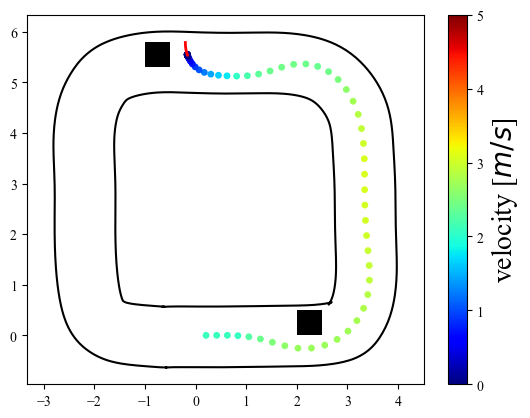

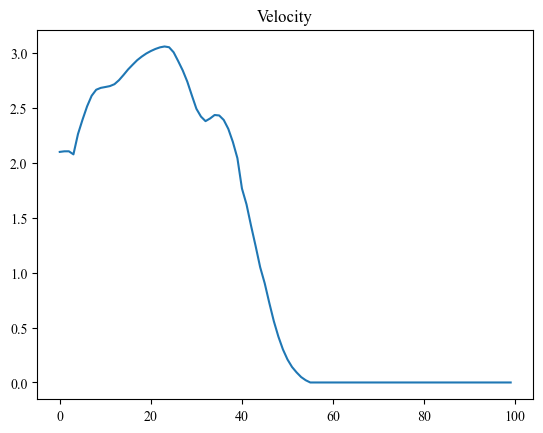

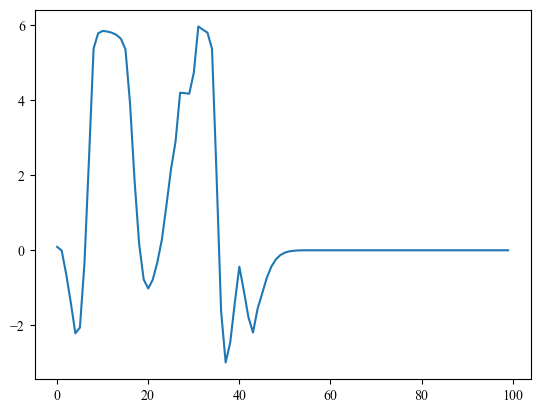

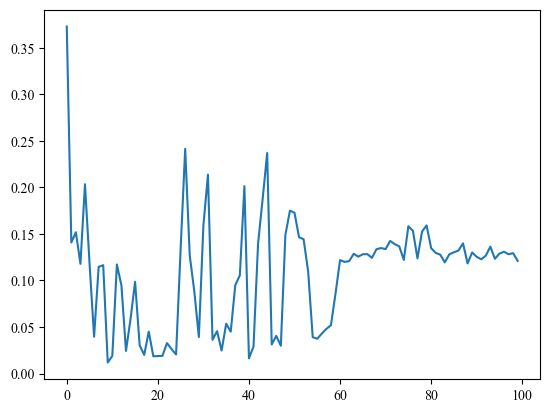

In [67]:
x_cur = np.array([0, 0, 2, 0, 0])  # Initial state.

# Load ILQR
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)

config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR() #(config_file)
solver.update_path(path)

obs1 = np.array([[-1, -1, -0.5, -0.5], [5.3, 5.8, 5.8, 5.3]]).T
obs2 = np.array([[1, 1.25, 1.5, 1.5, 1.25, 1], [5.8, 5.4, 5.8 , 6.0, 6.2, 6.0]]).T
obs3 = np.array([[2.5, 2.5, 2, 2], [-0, 0.5, 0.5, -0]]).T
# obs4 = np.array([[-200, -200, -1.5, -1.5], [0.5, 1, 1, 0.5]]).T
obs_list = [[obs1 for _ in range(10)], 
            [obs2 for _ in range(10)],
            [obs3 for _ in range(10)]]
            # [obs4 for _ in range(10)]]
solver.update_obstacles(obs_list)

# define some parameters
n = 10
itr_receding = 100
init_control = np.zeros((2, n))
fig_prog_folder = 'fig/'

state_history = np.zeros((5,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    
    plan = solver.plan(x_cur)#, init_control)
    states = plan['states']
    controls = plan['controls']
    x_cur = states[:,1]
    state_history[:,i]  = x_cur
    init_control[:,:-1] = controls[:,1:]
    pbar.set_description(f"iLQR takes : {plan['t_process']:.2f} sec']")
    t_process[i] = plan['t_process']
    # plot
    plt.clf()
    path.plot_track()
    p = Polygon(obs1, facecolor = 'k')
    plt.gca().add_patch(p)

    p = Polygon(obs2, facecolor = 'k')
    plt.gca().add_patch(p)

    p = Polygon(obs3, facecolor = 'k')
    plt.gca().add_patch(p)

    # p = Polygon(obs4, facecolor = 'k')
    # plt.gca().add_patch(p)
    
    sc = plt.scatter(
        state_history[0, :i], state_history[1, :i], s=24,
        c=state_history[2, :i], cmap=cm.jet, vmin=0, vmax=5,
        edgecolor='none', marker='o'
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(r"velocity [$m/s$]", size=20)
    
    plt.plot(states[0, :], states[1, :], 'r', linewidth=2)
    plt.axis('equal')
    plt.savefig(os.path.join(fig_prog_folder, str(i)+".png"), dpi=200)
plt.close('All')

gif_path = os.path.join(fig_prog_folder, 'rollout.gif')
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(itr_receding):
        filename = os.path.join(fig_prog_folder, str(i)+".png")
        image = imageio.imread(filename)
        writer.append_data(image)

plt.figure()
plt.plot(state_history[2,:])
plt.title('Velocity')


plt.figure()
a = state_history[2, :]**2 / 0.257 * np.tan(state_history[-1, :])
plt.plot(a)

plt.figure()
plt.plot(t_process)

